In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Reading cvs file using pandas
df = pd.read_csv('datasets/weekly_earthquakes.csv')

#time, latitude, longitude, depth, mag, magType, place

df.sort_values(by='time', ascending=False, inplace=True)


    
df['year'] = [datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').year for x in df['time']]
df['month'] = [datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').month for x in df['time']]
df['day'] = [datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').day for x in df['time']]

#2022-08-30
subdf = df.query("year==2022 & month==8 & (day>23 & day<=30)")

lowmag = subdf.query("mag < 3")
midmag = subdf.query("mag >= 3 & mag < 5")
highmag = subdf.query("mag >= 5")



#df['date'] = [adf['time']]


/tmp/ipykernel_278203/4098774739.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


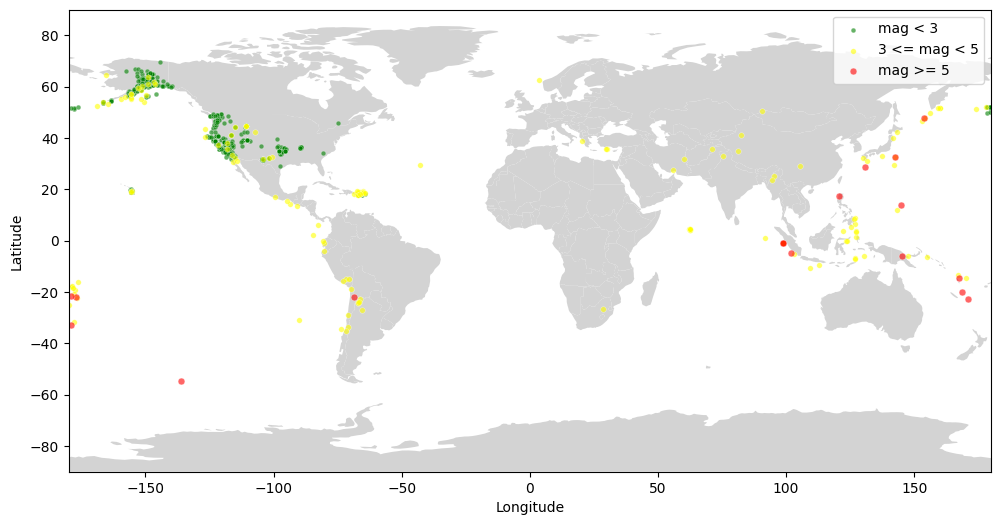

In [105]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

#here with varying intensity
#plt.scatter(x=lowmag['longitude'], y=lowmag['latitude'], s=2*lowmag['mag'], c=lowmag['mag'], alpha=0.6,cmap='autumn')
#plt.colorbar(label='Impact Energy [kt]')

sns.scatterplot(x=lowmag['longitude'], y=lowmag['latitude'], color='green', alpha=0.6, s=12, ax=ax)

sns.scatterplot(x=midmag['longitude'], y=midmag['latitude'], color='yellow', alpha=0.6, s=16, ax=ax)

sns.scatterplot(x=highmag['longitude'], y=highmag['latitude'], color='red', alpha=0.6, s=24, ax=ax)

plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.legend(labels=['mag < 3', '3 <= mag < 5', 'mag >= 5'])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [136]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.manifold import MDS
import umap.umap_ as umap
sns.set(context='notebook', style='white', rc={'figure.figsize':(14, 10)})

happy = pd.read_csv('datasets/world_happy_ind_2022.csv')
# RANK Country 	Happiness score 	Whisker-high 	Whisker-low 	Dystopia (1.83) + residual 	Explained by: GDP per capita 	Explained by: Social support 	Explained by: Healthy life expectancy 	Explained by: Freedom to make life choices 	Explained by: Generosity 	Explained by: Perceptions of corruption
#finland, denmark, iceland, swiss, holland
# botswana, rwanda, zimbab, lebanon, afghan

happy.drop(['Country'], axis=1, inplace=True)
print(happy.tail())


pca_result = PCA(n_components=3).fit_transform(happy)
happy['pca0'] = pca_result[:,0]
happy['pca1'] = pca_result[:,1]

mds_result = MDS(n_components=2, metric=False, normalized_stress='auto').fit_transform(happy)
happy['mds0'] = mds_result[:,0]
happy['mds1'] = mds_result[:,1]


embedding = umap.UMAP(n_neighbors=5, random_state=42).fit(happy).transform(happy)
happy['umap0'] = embedding[:,0]
happy['umap1'] = embedding[:,1]

tsne_result = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300).fit_transform(happy)
happy['tsne0'] = tsne_result[:,0]
happy['tsne1'] = tsne_result[:,1]


     RANK  Happiness score  Whisker-high  Whisker-low  \
141   142            3.471         3.667        3.275   
142   143            3.268         3.462        3.074   
143   144            2.995         3.110        2.880   
144   145            2.955         3.049        2.862   
145   146            2.404         2.469        2.339   

     Dystopia (1.83) + residual  Explained by: GDP per capita  \
141                       0.187                         1.503   
142                       0.536                         0.785   
143                       0.548                         0.947   
144                       0.216                         1.392   
145                       1.263                         0.758   

     Explained by: Social support  Explained by: Healthy life expectancy  \
141                         0.815                                  0.280   
142                         0.133                                  0.462   
143                         0.690     

/tmp/ipykernel_278203/844080645.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax1.figure.colorbar(sm)
/tmp/ipykernel_278203/844080645.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax2.figure.colorbar(sm)
/tmp/ipykernel_278203/844080645.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axe

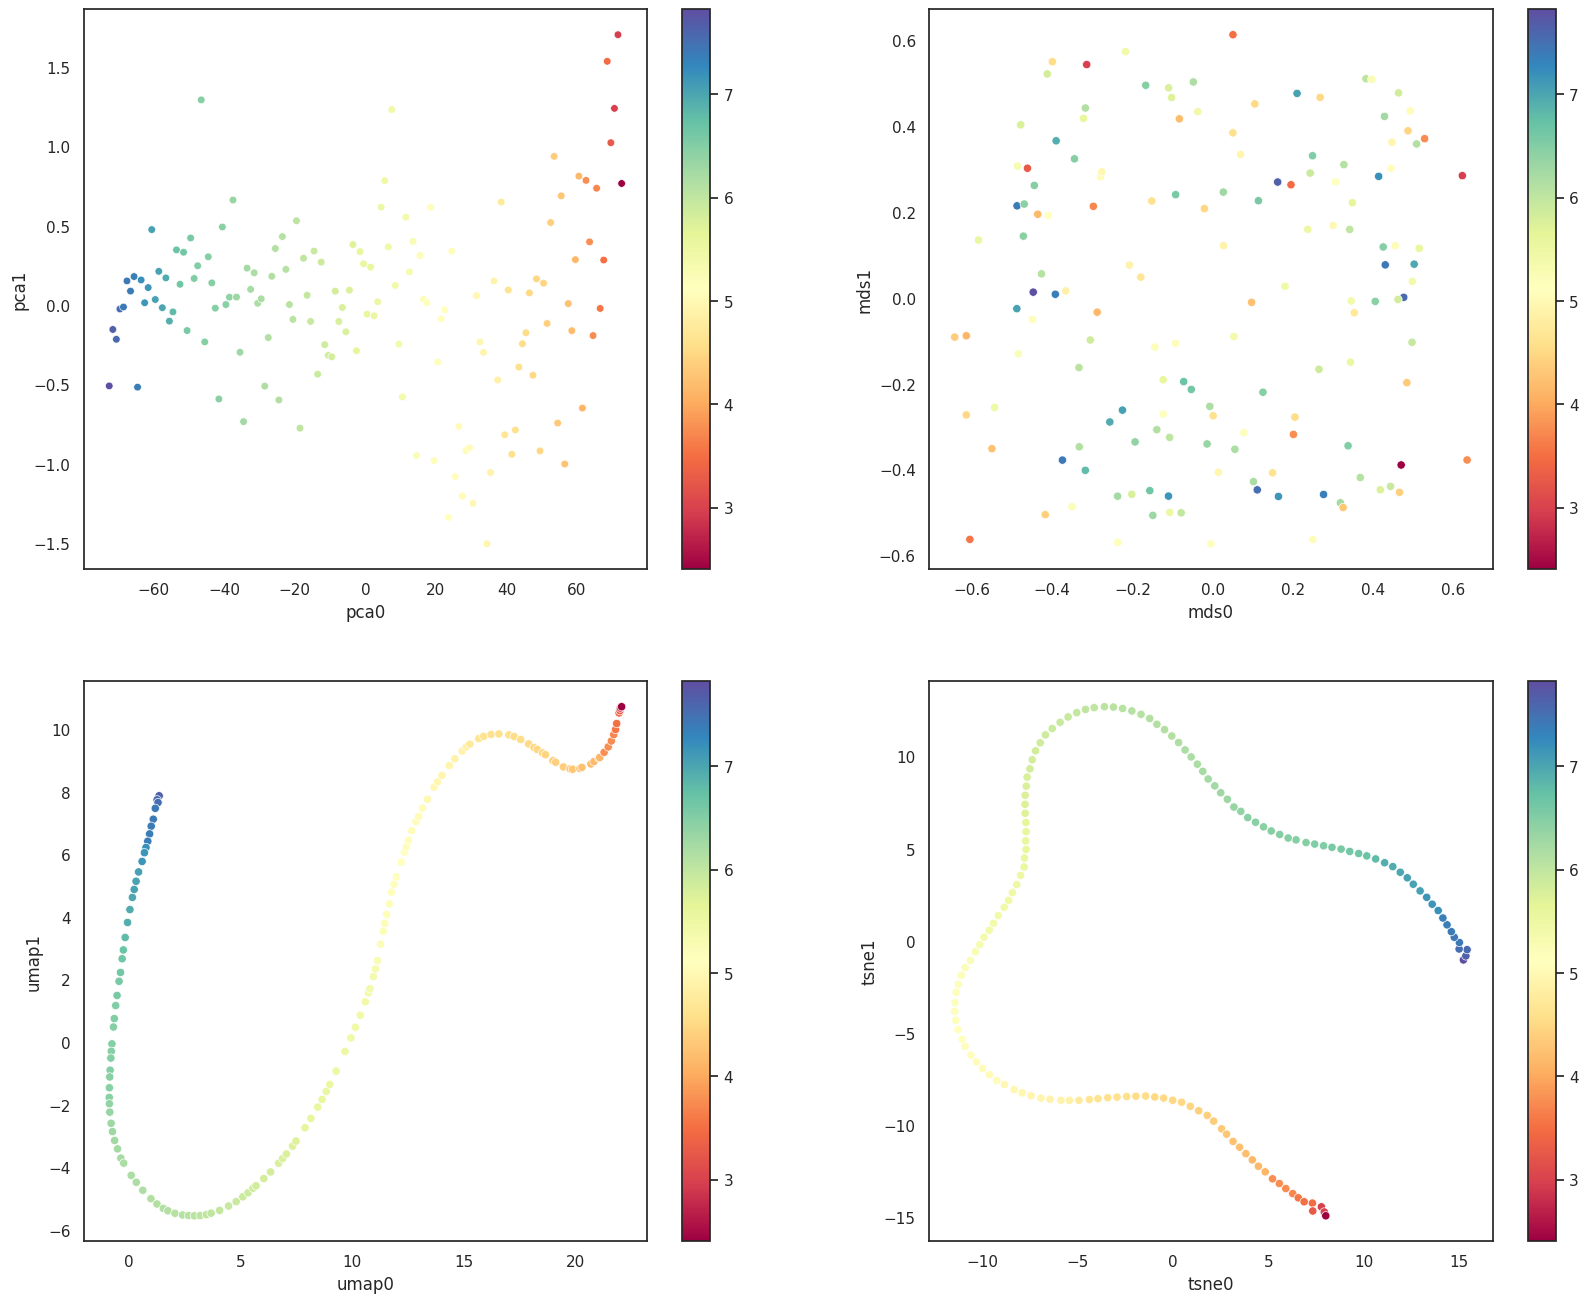

In [157]:
cmap = sns.color_palette("Spectral", as_cmap=True)
# sns.color_palette("tab10")
# sns.color_palette("hls", 8)
# sns.color_palette("viridis", as_cmap=True)
# sns.color_palette("Blues", as_cmap=True)
# sns.color_palette("YlOrBr", as_cmap=True)
# sns.color_palette("icefire", as_cmap=True)
# sns.color_palette("vlag", as_cmap=True)
norm = plt.Normalize(happy['Happiness score'].min(), happy['Happiness score'].max())
sm = plt.cm.ScalarMappable(cmap = cmap, norm=norm)
sm.set_array([])

plt.figure(figsize=(20, 16))

ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(
    x="pca0", y="pca1",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    s=30,
    ax=ax1
)

ax1.get_legend().remove()
ax1.figure.colorbar(sm)

ax2 = plt.subplot(2,2, 2)
sns.scatterplot(
    x="mds0", y="mds1",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    ax=ax2
)

ax2.get_legend().remove()
ax2.figure.colorbar(sm)

ax3 = plt.subplot(2,2, 3)
sns.scatterplot(
    x="umap0", y="umap1",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    ax=ax3
)

ax3.get_legend().remove()
ax3.figure.colorbar(sm)

ax4 = plt.subplot(2,2, 4)
sns.scatterplot(
    x="tsne0", y="tsne1",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    ax=ax4
)
ax4.get_legend().remove()
ax4.figure.colorbar(sm)

plt.show()


/tmp/ipykernel_278203/1211651969.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax1.figure.colorbar(sm)
/tmp/ipykernel_278203/1211651969.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax2.figure.colorbar(sm)
/tmp/ipykernel_278203/1211651969.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an 

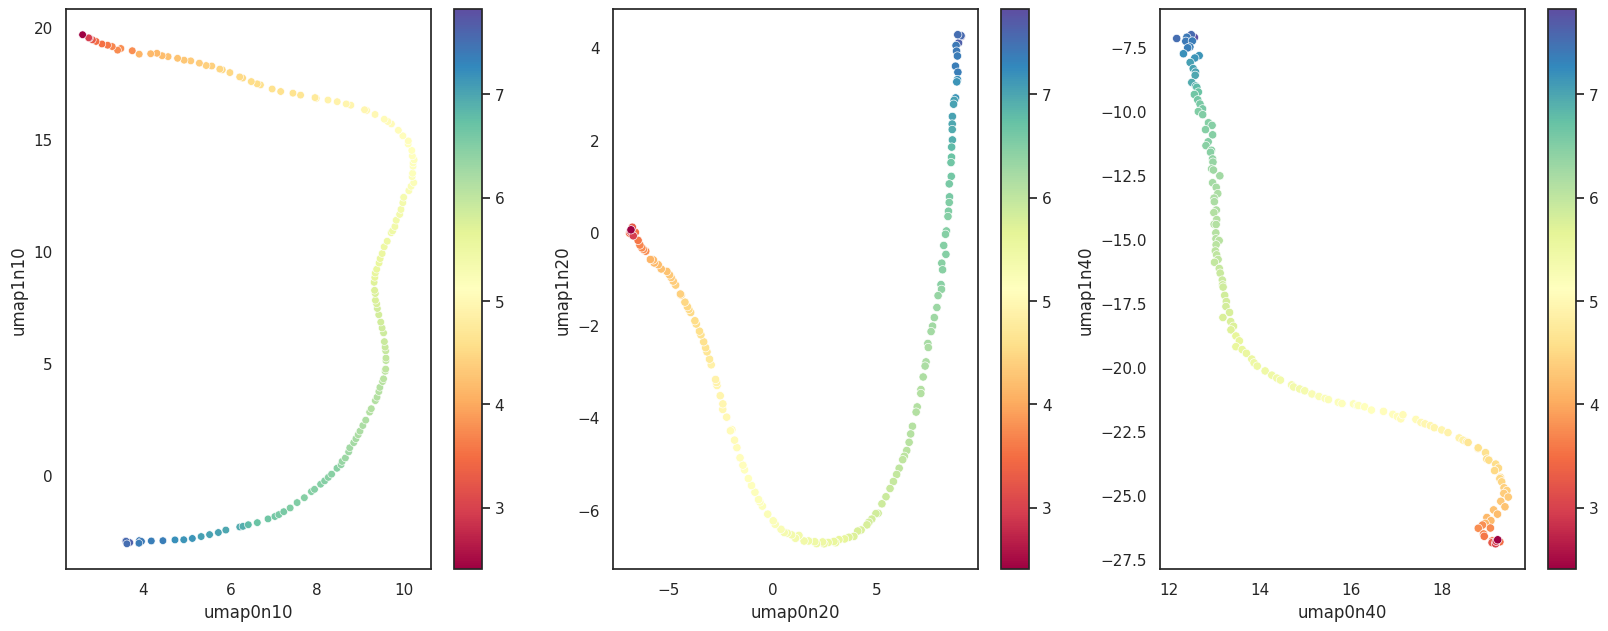

In [158]:
embedding = umap.UMAP(n_neighbors=10, random_state=42).fit(happy).transform(happy)
happy['umap0n10'] = embedding[:,0]
happy['umap1n10'] = embedding[:,1]
embedding = umap.UMAP(n_neighbors=20, random_state=42).fit(happy).transform(happy)
happy['umap0n20'] = embedding[:,0]
happy['umap1n20'] = embedding[:,1]
embedding = umap.UMAP(n_neighbors=40, random_state=42).fit(happy).transform(happy)
happy['umap0n40'] = embedding[:,0]
happy['umap1n40'] = embedding[:,1]

plt.figure(figsize=(20, 16))

ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(
    x="umap0n10", y="umap1n10",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    s=30,
    ax=ax1
)

ax1.get_legend().remove()
ax1.figure.colorbar(sm)

ax2 = plt.subplot(2,3, 2)
sns.scatterplot(
    x="umap0n20", y="umap1n20",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    ax=ax2
)

ax2.get_legend().remove()
ax2.figure.colorbar(sm)

ax3 = plt.subplot(2,3, 3)
sns.scatterplot(
    x="umap0n40", y="umap1n40",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    ax=ax3
)

ax3.get_legend().remove()
ax3.figure.colorbar(sm)


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 146 samples in 0.000s...
[t-SNE] Computed neighbors for 146 samples in 0.140s...
[t-SNE] Computed conditional probabilities for sample 146 / 146
[t-SNE] Mean sigma: 11.611837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.647003
[t-SNE] KL divergence after 300 iterations: 0.139582
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 146 samples in 0.000s...
[t-SNE] Computed neighbors for 146 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 146 / 146
[t-SNE] Mean sigma: 23.998744
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.775730
[t-SNE] KL divergence after 300 iterations: 0.086068
[t-SNE] Computing 145 nearest neighbors...
[t-SNE] Indexed 146 samples in 0.000s...
[t-SNE] Computed neighbors for 146 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 146 / 146
[t-SNE] Mean sigma: 37.346805
[t-SNE] KL divergence after 250 itera

/tmp/ipykernel_278203/213024493.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax1.figure.colorbar(sm)
/tmp/ipykernel_278203/213024493.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax2.figure.colorbar(sm)
/tmp/ipykernel_278203/213024493.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axe

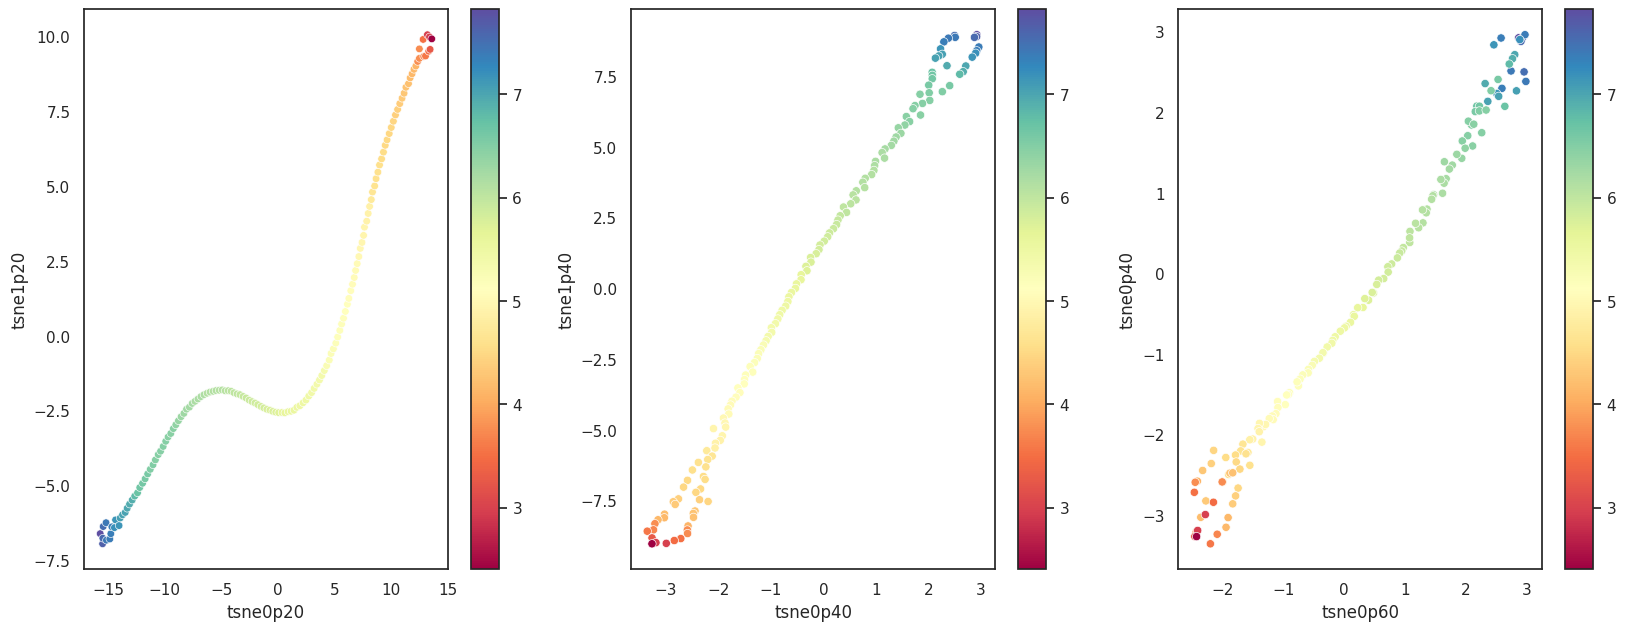

In [159]:
tsne_result = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300).fit_transform(happy)
happy['tsne0p20'] = tsne_result[:,0]
happy['tsne1p20'] = tsne_result[:,1]
tsne_result = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(happy)
happy['tsne0p40'] = tsne_result[:,0]
happy['tsne1p40'] = tsne_result[:,1]
tsne_result = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300).fit_transform(happy)
happy['tsne0p60'] = tsne_result[:,0]
happy['tsne1p60'] = tsne_result[:,1]

plt.figure(figsize=(20, 16))

ax1 = plt.subplot(2, 3, 1)
sns.scatterplot(
    x="tsne0p20", y="tsne1p20",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    s=30,
    ax=ax1
)

ax1.get_legend().remove()
ax1.figure.colorbar(sm)

ax2 = plt.subplot(2,3, 2)
sns.scatterplot(
    x="tsne0p40", y="tsne1p40",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    ax=ax2
)

ax2.get_legend().remove()
ax2.figure.colorbar(sm)

ax3 = plt.subplot(2,3, 3)
sns.scatterplot(
    x="tsne0p60", y="tsne0p40",
    hue="Happiness score",
    palette=cmap,
    data=happy,
    legend="full",
    alpha=1,
    ax=ax3
)

ax3.get_legend().remove()
ax3.figure.colorbar(sm)

(75.0, 135.0)

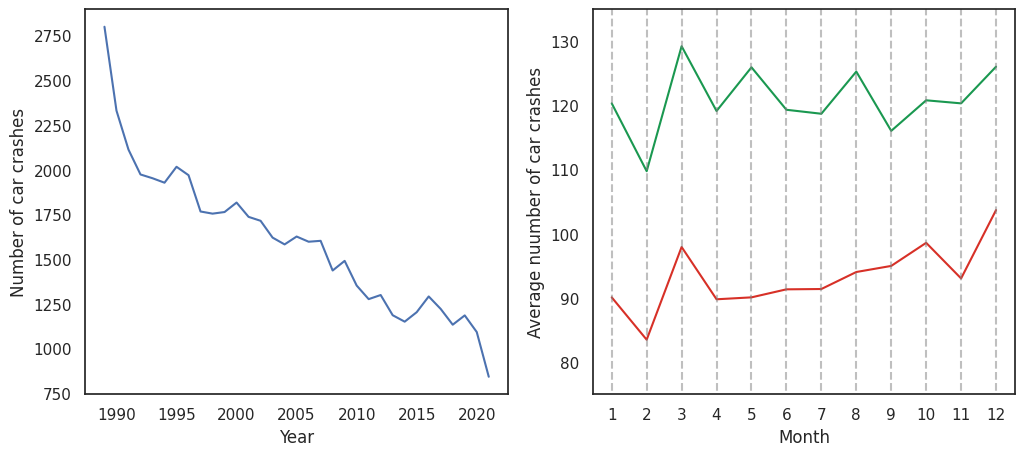

In [220]:
cc = pd.read_csv("datasets/AU_car_crash.csv")
# Crash ID, State, Month, Year, Dayweek, Age, Time of day, Day of week, Time



#total number of incidents from 1980 to 2022
ccy = cc.groupby("Year", dropna=True).count()
ccy.drop(columns=ccy.columns[1:], inplace=True)
ccy.rename(columns={"Crash ID":"count"}, inplace=True)

#average number of incidents each month, difference between 1980 to 2000 and 2000 to 2020
ccpast_monthlyavg = cc.query("Year >= 1980 & Year < 2000").groupby("Month", dropna=True).count() / 20
ccpast_monthlyavg.drop(columns=ccpast_monthlyavg.columns[1:], inplace=True)
ccpast_monthlyavg.rename(columns={"Crash ID":"count"}, inplace=True)


ccnow_monthlyavg = cc.query("Year >= 2000").groupby("Month", dropna=True).count() / 21
ccnow_monthlyavg.drop(columns=ccnow_monthlyavg.columns[1:], inplace=True)
ccnow_monthlyavg.rename(columns={"Crash ID":"count"}, inplace=True)


plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2, 1)
sns.lineplot(x=ccy.index, y="count", data=ccy, ax=ax1 )
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of car crashes")
ax1.set_xticks(np.arange(1990, 2021, step= 5))

ax2 = plt.subplot(1,2, 2)
sns.lineplot(x=ccpast_monthlyavg.index, y="count", data=ccpast_monthlyavg, ax=ax2, color="#d73027")
sns.lineplot(x=ccnow_monthlyavg.index, y="count", data=ccnow_monthlyavg, ax=ax2, color="#1a9850")
ax2.set_xlabel("Month")
ax2.set_xticks(range(1,13))
ax2.set_ylabel("Average nuumber of car crashes")

ax2.vlines(x = range(1,13),    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 140, # Top of the plot
           alpha=0.5,
           color="grey",
           linestyle="--") 
ax2.set_yticks(np.arange(start=80,stop=140, step=10, dtype=int))

ax2.set_ylim(75,135)
